### Install the package

In [2]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-rts_3j2k
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-rts_3j2k
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=30506 sha256=2c4582e0eba686042e1b7fa7d37fe2f1b86892b13f0cd6aa9851ce21ca9236d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-zfiwmzsf/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation


### Download the dataset

In [2]:
#! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

In [3]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
   creating: data/images_prepped_train/
  inflating: data/images_prepped_train/b165-789_Clipped.jpg  
  inflating: data/images_prepped_train/b165-558_Clipped.jpg  
  inflating: data/images_prepped_train/b165-003_Clipped.jpg  
  inflating: data/images_prepped_train/b161-308_Clipped.jpg  
  inflating: data/images_prepped_train/b160-646_Clipped.jpg  
  inflating: data/images_prepped_train/b156-354_Clipped.jpg  
  inflating: data/images_prepped_train/b154-945_Clipped.jpg  
  inflating: data/images_prepped_train/b154-308_Clipped.jpg  
  inflating: data/images_prepped_train/b152-009_Clipped.jpg  
  inflating: data/images_prepped_train/b150-659_Clipped.jpg  
  inflating: data/images_prepped_train/b148-743_Clipped.jpg  
  inflating: data/images_prepped_train/b147-797_Clipped.jpg  
  inflating: data/images_prepped_train/b146-945_Clipped.jpg  
  inflating: data/images_prepped_train/b145-013_Clipped.jpg  
  inflating: data/images_prepped_train/b140-8

### Initialize the model

In [4]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640 )

58892288/58889256 [==============================] - 2s 0us/step


### Train the model

In [5]:
model.train(
    train_images =  "data/images_prepped_train/",
    train_annotations = "data/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5,
    n_classes=4
)

  4%|▍         | 9/230 [00:00<00:02, 82.88it/s]

Verifying training dataset


100%|██████████| 230/230 [00:02<00:00, 94.45it/s]

Dataset verified! 
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/5
512/512 [==============================] - 94s 184ms/step - loss: 0.3443 - accuracy: 0.9127
Epoch 2/5
512/512 [==============================] - 99s 194ms/step - loss: 0.1760 - accuracy: 0.9441
Epoch 3/5
512/512 [==============================] - 99s 193ms/step - loss: 0.1589 - accuracy: 0.9480
Epoch 4/5
512/512 [==============================] - 99s 193ms/step - loss: 0.1458 - accuracy: 0.9514
Epoch 5/5
512/512 [==============================] - 98s 192ms/step - loss: 0.1375 - accuracy: 0.9537


In [8]:
out = model.predict_segmentation(
    inp="data/images_prepped_test/b1-09517_Clipped.jpg",
    out_fname="/tmp/out.png"
)

In [9]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

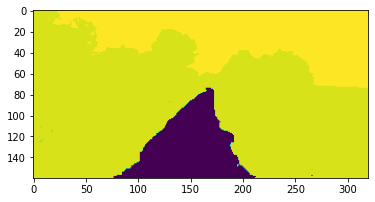

In [10]:
plt.imshow(out)

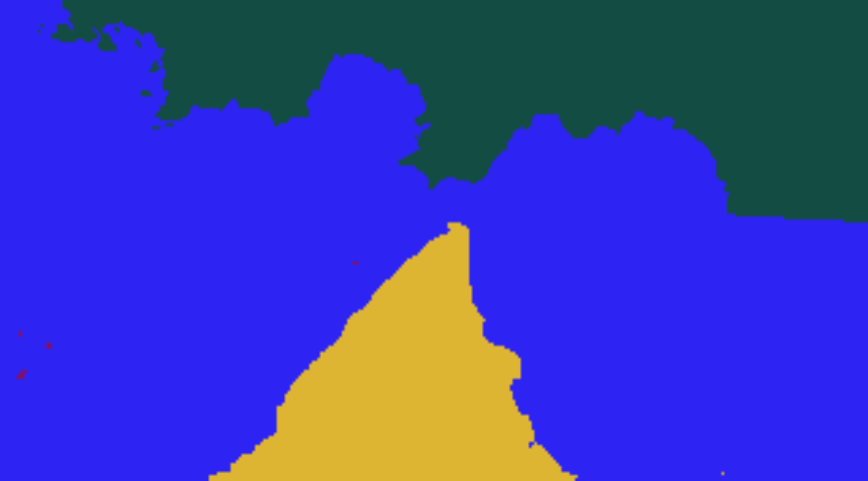

In [11]:
from IPython.display import Image
Image('/tmp/out.png')

In [17]:
o = model.predict_segmentation(
    inp="data/images_prepped_test/b1-09517_Clipped.jpg",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky","Road","Tree"]

)

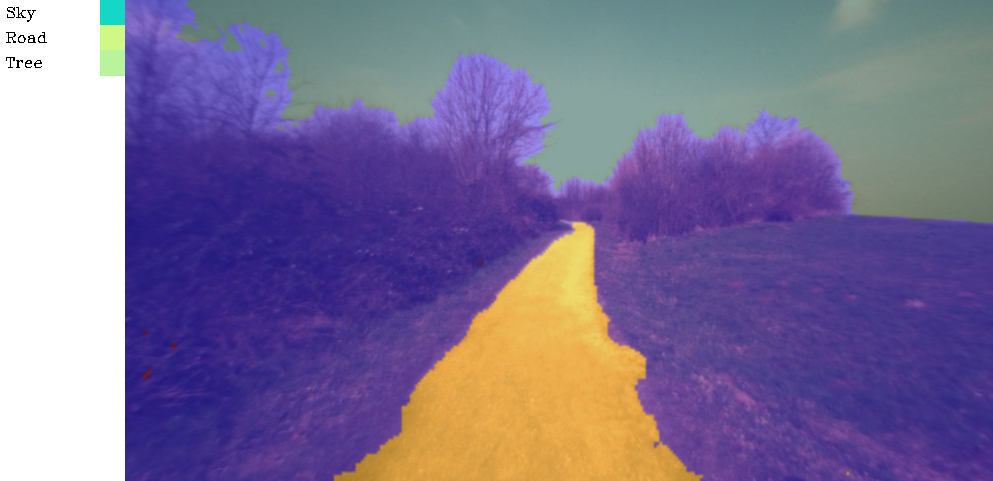

In [18]:
from IPython.display import Image
Image('/tmp/out.png')

In [25]:
!zip -r /content/tmp.zip /tmp

  adding: tmp/ (stored 0%)
  adding: tmp/vgg_unet_1.0.data-00000-of-00001 (deflated 5%)
  adding: tmp/out.png (deflated 2%)
  adding: tmp/vgg_unet_1.3.index (deflated 76%)
  adding: tmp/vgg_unet_1.4.index (deflated 76%)
  adding: tmp/vgg_unet_1.1.data-00000-of-00001 (deflated 12%)
  adding: tmp/tmpsh2k0fdr.py (deflated 59%)
  adding: tmp/vgg_unet_1.2.data-00000-of-00001 (deflated 14%)
  adding: tmp/__pycache__/ (stored 0%)
  adding: tmp/__pycache__/tmpsh2k0fdr.cpython-36.pyc (deflated 41%)
  adding: tmp/__pycache__/tmpcquaggjd.cpython-36.pyc (deflated 40%)
  adding: tmp/__pycache__/tmp6cnk52xy.cpython-36.pyc (deflated 40%)
  adding: tmp/__pycache__/tmpglli7zx2.cpython-36.pyc (deflated 40%)
  adding: tmp/vgg_unet_1.0.index (deflated 76%)
  adding: tmp/vgg_unet_1.2.index (deflated 76%)
  adding: tmp/vgg_unet_1.1.index (deflated 76%)
  adding: tmp/vgg_unet_1.3.data-00000-of-00001 (deflated 14%)
  adding: tmp/checkpoint (deflated 38%)
  adding: tmp/vgg_unet_1_config.json (deflated 35%)
  a

In [26]:
from google.colab import files
files.download("/content/tmp.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>